In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bug_ids_states = [("2",41), ("8",14), ("10",15), ("18",21), ("19",7), ("21",12), ("44",21),
                ("53",19), ("71",10), ("117",11), ("128",28), ("129", 52), ("130",15),
                ("135",15), ("191",6), ("201",11), ("206",15), ("209",53), ("256",19),
                ("1066",5), ("1067",10), ("1073",9), ("1096",14), ("1145",10), ("1146",3),
                ("1147",8), ("1149", 10), ("1151",17), ("1152",5), ("1202",18), ("1205",22), ("1207",13),
                ("1214",12), ("1215",28), ("1223",77), ("1224",38),
                ("1226",43), ("1299",20), ("1399",15), ("1406",20), ("1430",21), ("1441",19),
                ("1445",14), ("1481",58), ("1645",24)]

#bug_ids_states = [("2",41)]
src_dir = '/Users/junayed/Documents/NecessaryDocs/GeorgeMasonUniversity/Research/Projects/BugLocalization/FaultLocalizationCode/SourceCodeMapping/MappingAndroidProject/results/11:22:22/Filtering+Boosting-GUI+Interacted'
file_list_df_st = pd.read_csv(src_dir + '/Files_Ranked_Based_On_Sentence_Transformers.csv')
file_list_df_replaced_query = pd.read_csv(src_dir + '/Files_Ranked_Based_On_Replaced_Query.csv')
file_list_df_query_expanstion_one = pd.read_csv(src_dir + '/Files_Ranked_Based_On_Query_Expansion_One.csv')
file_list_df_query_expanstion_two = pd.read_csv(src_dir + '/Files_Ranked_Based_On_Query_Expansion_Two.csv')
file_list_df_query_expanstion_three = pd.read_csv(src_dir + '/Files_Ranked_Based_On_Query_Expansion_Three.csv')

combined_results_df = pd.read_csv(src_dir + '/combinedResults.csv')

In [2]:
def string_to_list(buggy_ranks):
    if len(buggy_ranks)>=3:
        buggy_ranks = buggy_ranks[1:len(buggy_ranks)-1]
        buggy_ranks = buggy_ranks.split(', ')
    else:
        buggy_ranks = []
    return buggy_ranks

In [3]:
def create_similarity_figure(column_name, figure_location):
    plt.cla()
    fig = plt.figure(figsize=(30, 60), dpi=80)
    #fig, axs = plt.subplots(45, 1)
    ind=1
    for bug_id, app_state in bug_ids_states:
        #sentence-transformers
        files_for_bug_id_st = file_list_df_st.loc[file_list_df_st['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
        cos_scores_st = file_list_df_st.loc[file_list_df_st['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
        buggy_ranks_st = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), column_name].values[0]
        buggy_ranks_st = string_to_list(buggy_ranks_st)

        #plt.subplot(bug_id)
        x_axis_values = list(range(1,len(cos_scores_st)+1))
        #plt.plot(x_axis_values, cos_scores_st)
        #axs[ind,0].plot(x_axis_values, cos_scores_st)
        ax1 = plt.subplot(15,3, ind)
        plt.plot(x_axis_values, cos_scores_st)
        plt.xlabel('Bug-id=' + bug_id)
        ax1.set_xlim([0, 300])
        ax1.set_ylim([0, 0.8])
        ind = ind + 1

        for i in range(0, len(buggy_ranks_st)):
            #print(buggy_ranks_st[i])
            plt.plot(x_axis_values[int(buggy_ranks_st[i])], cos_scores_st[int(buggy_ranks_st[i])], 'r*')
        #plt.ylabel('cosine-similarity')

    plt.savefig(figure_location)

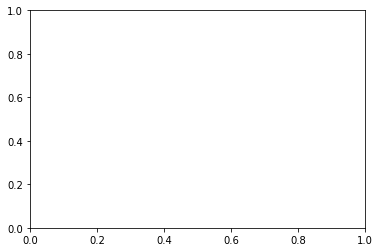

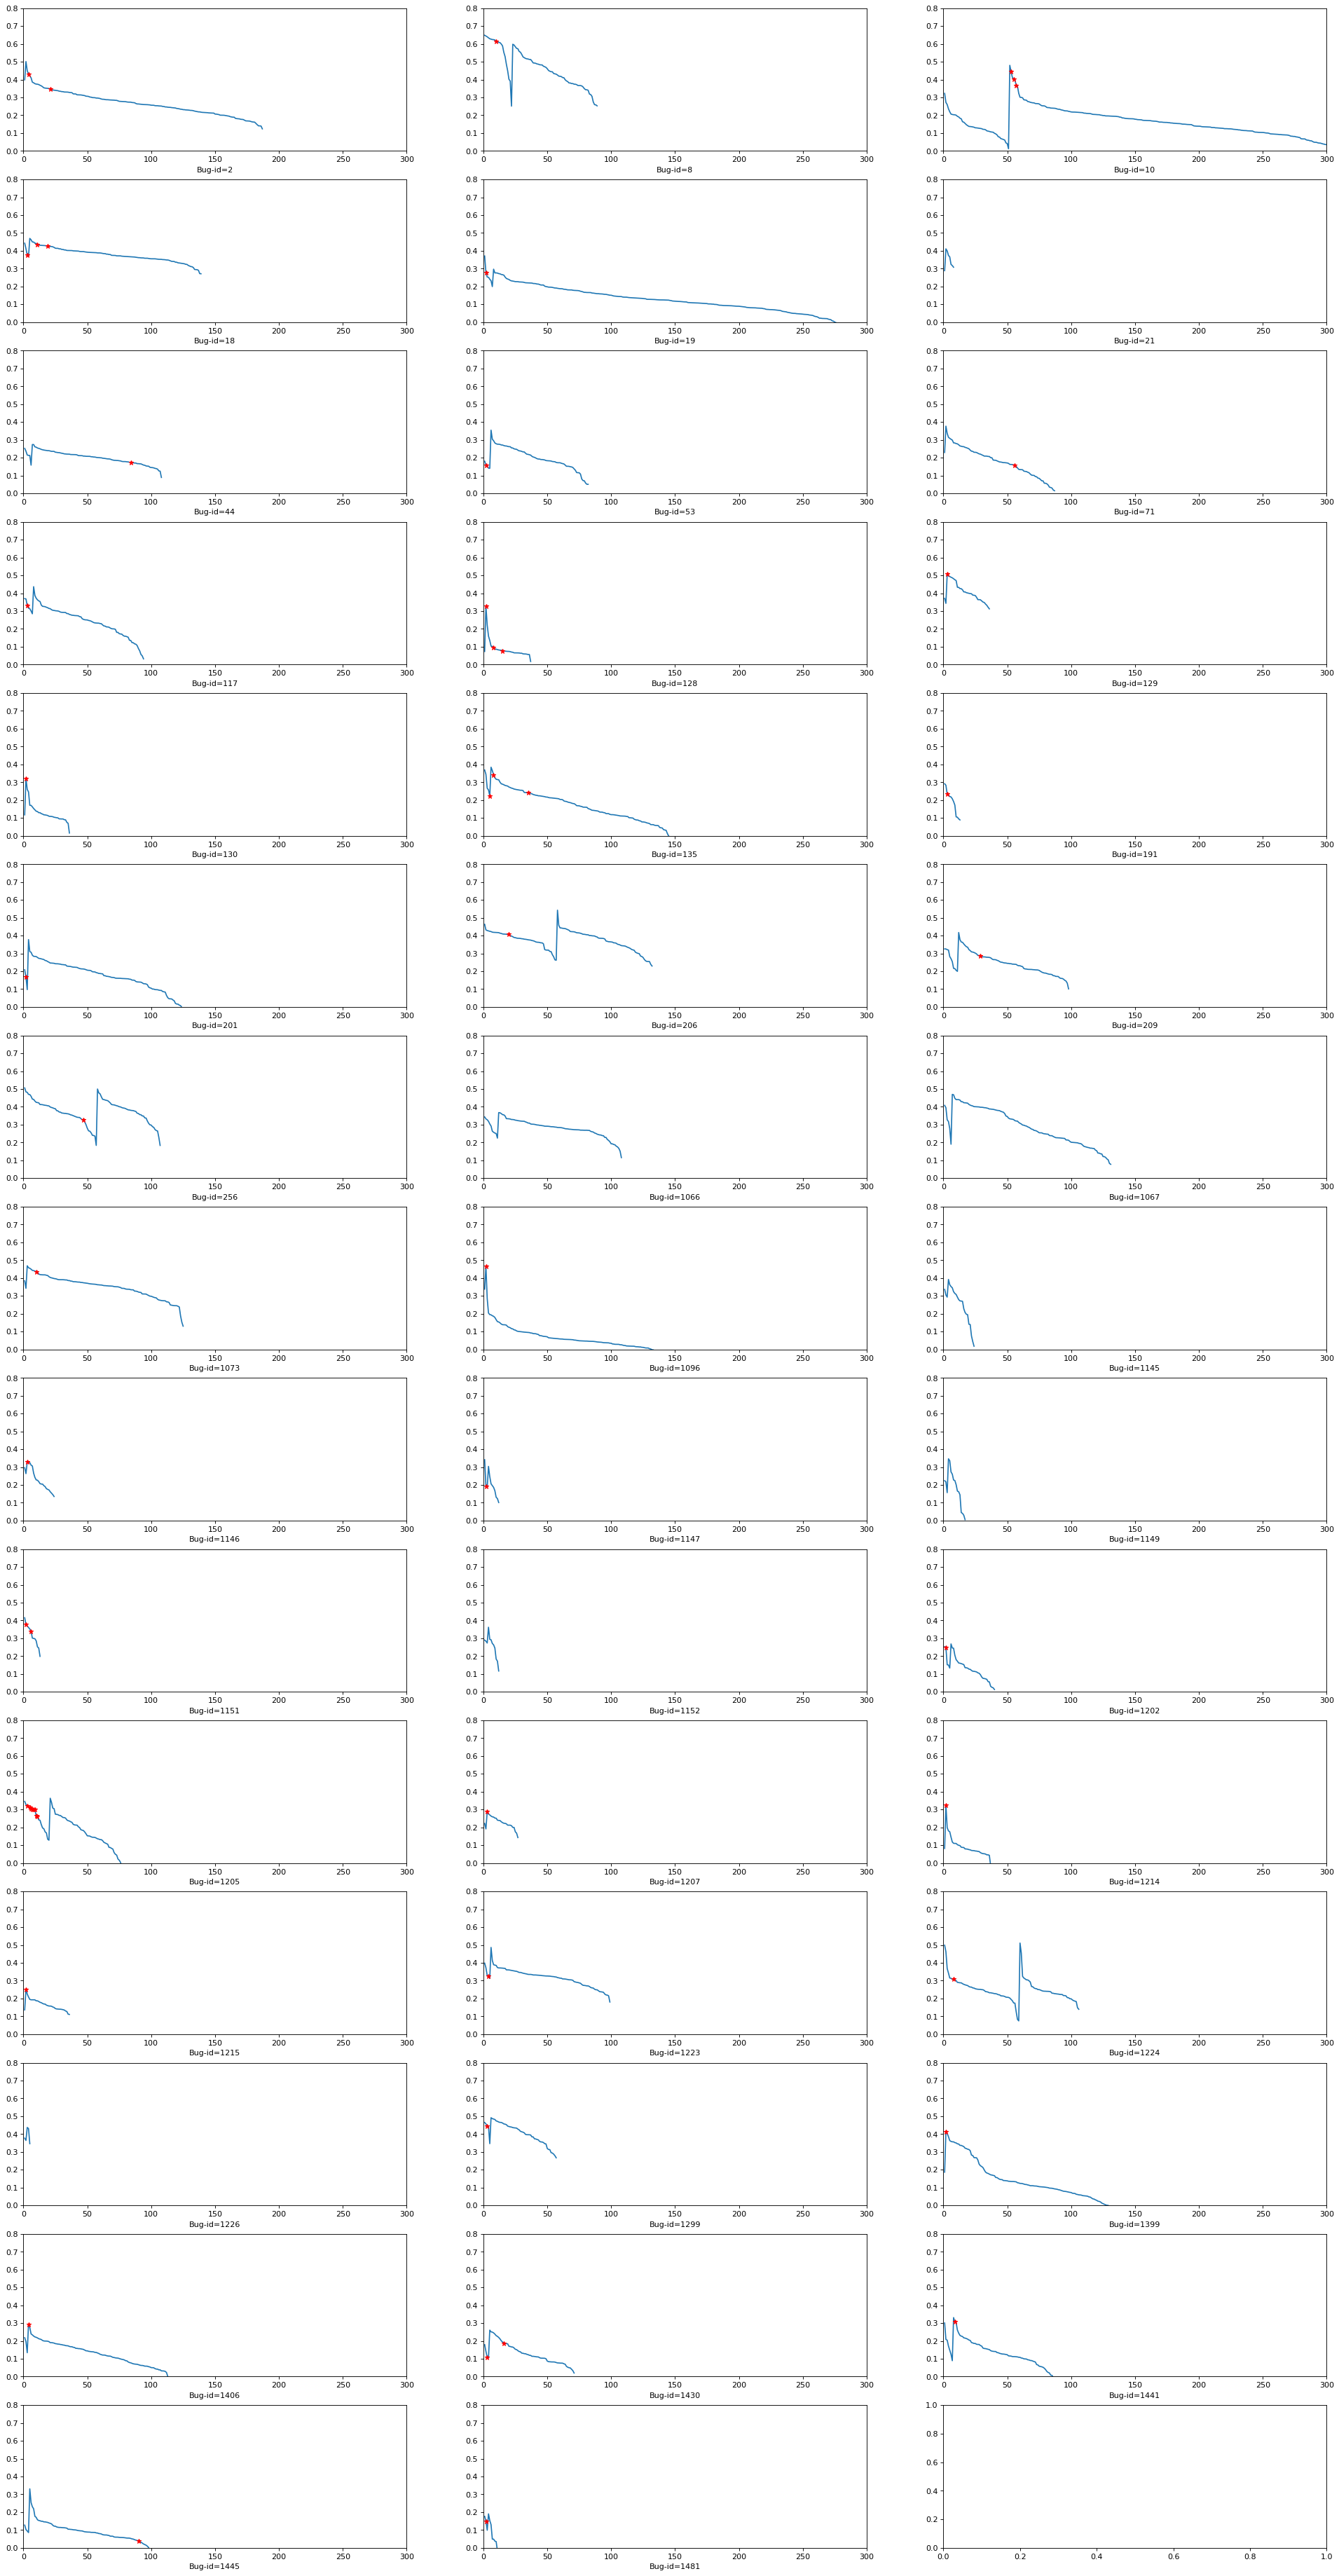

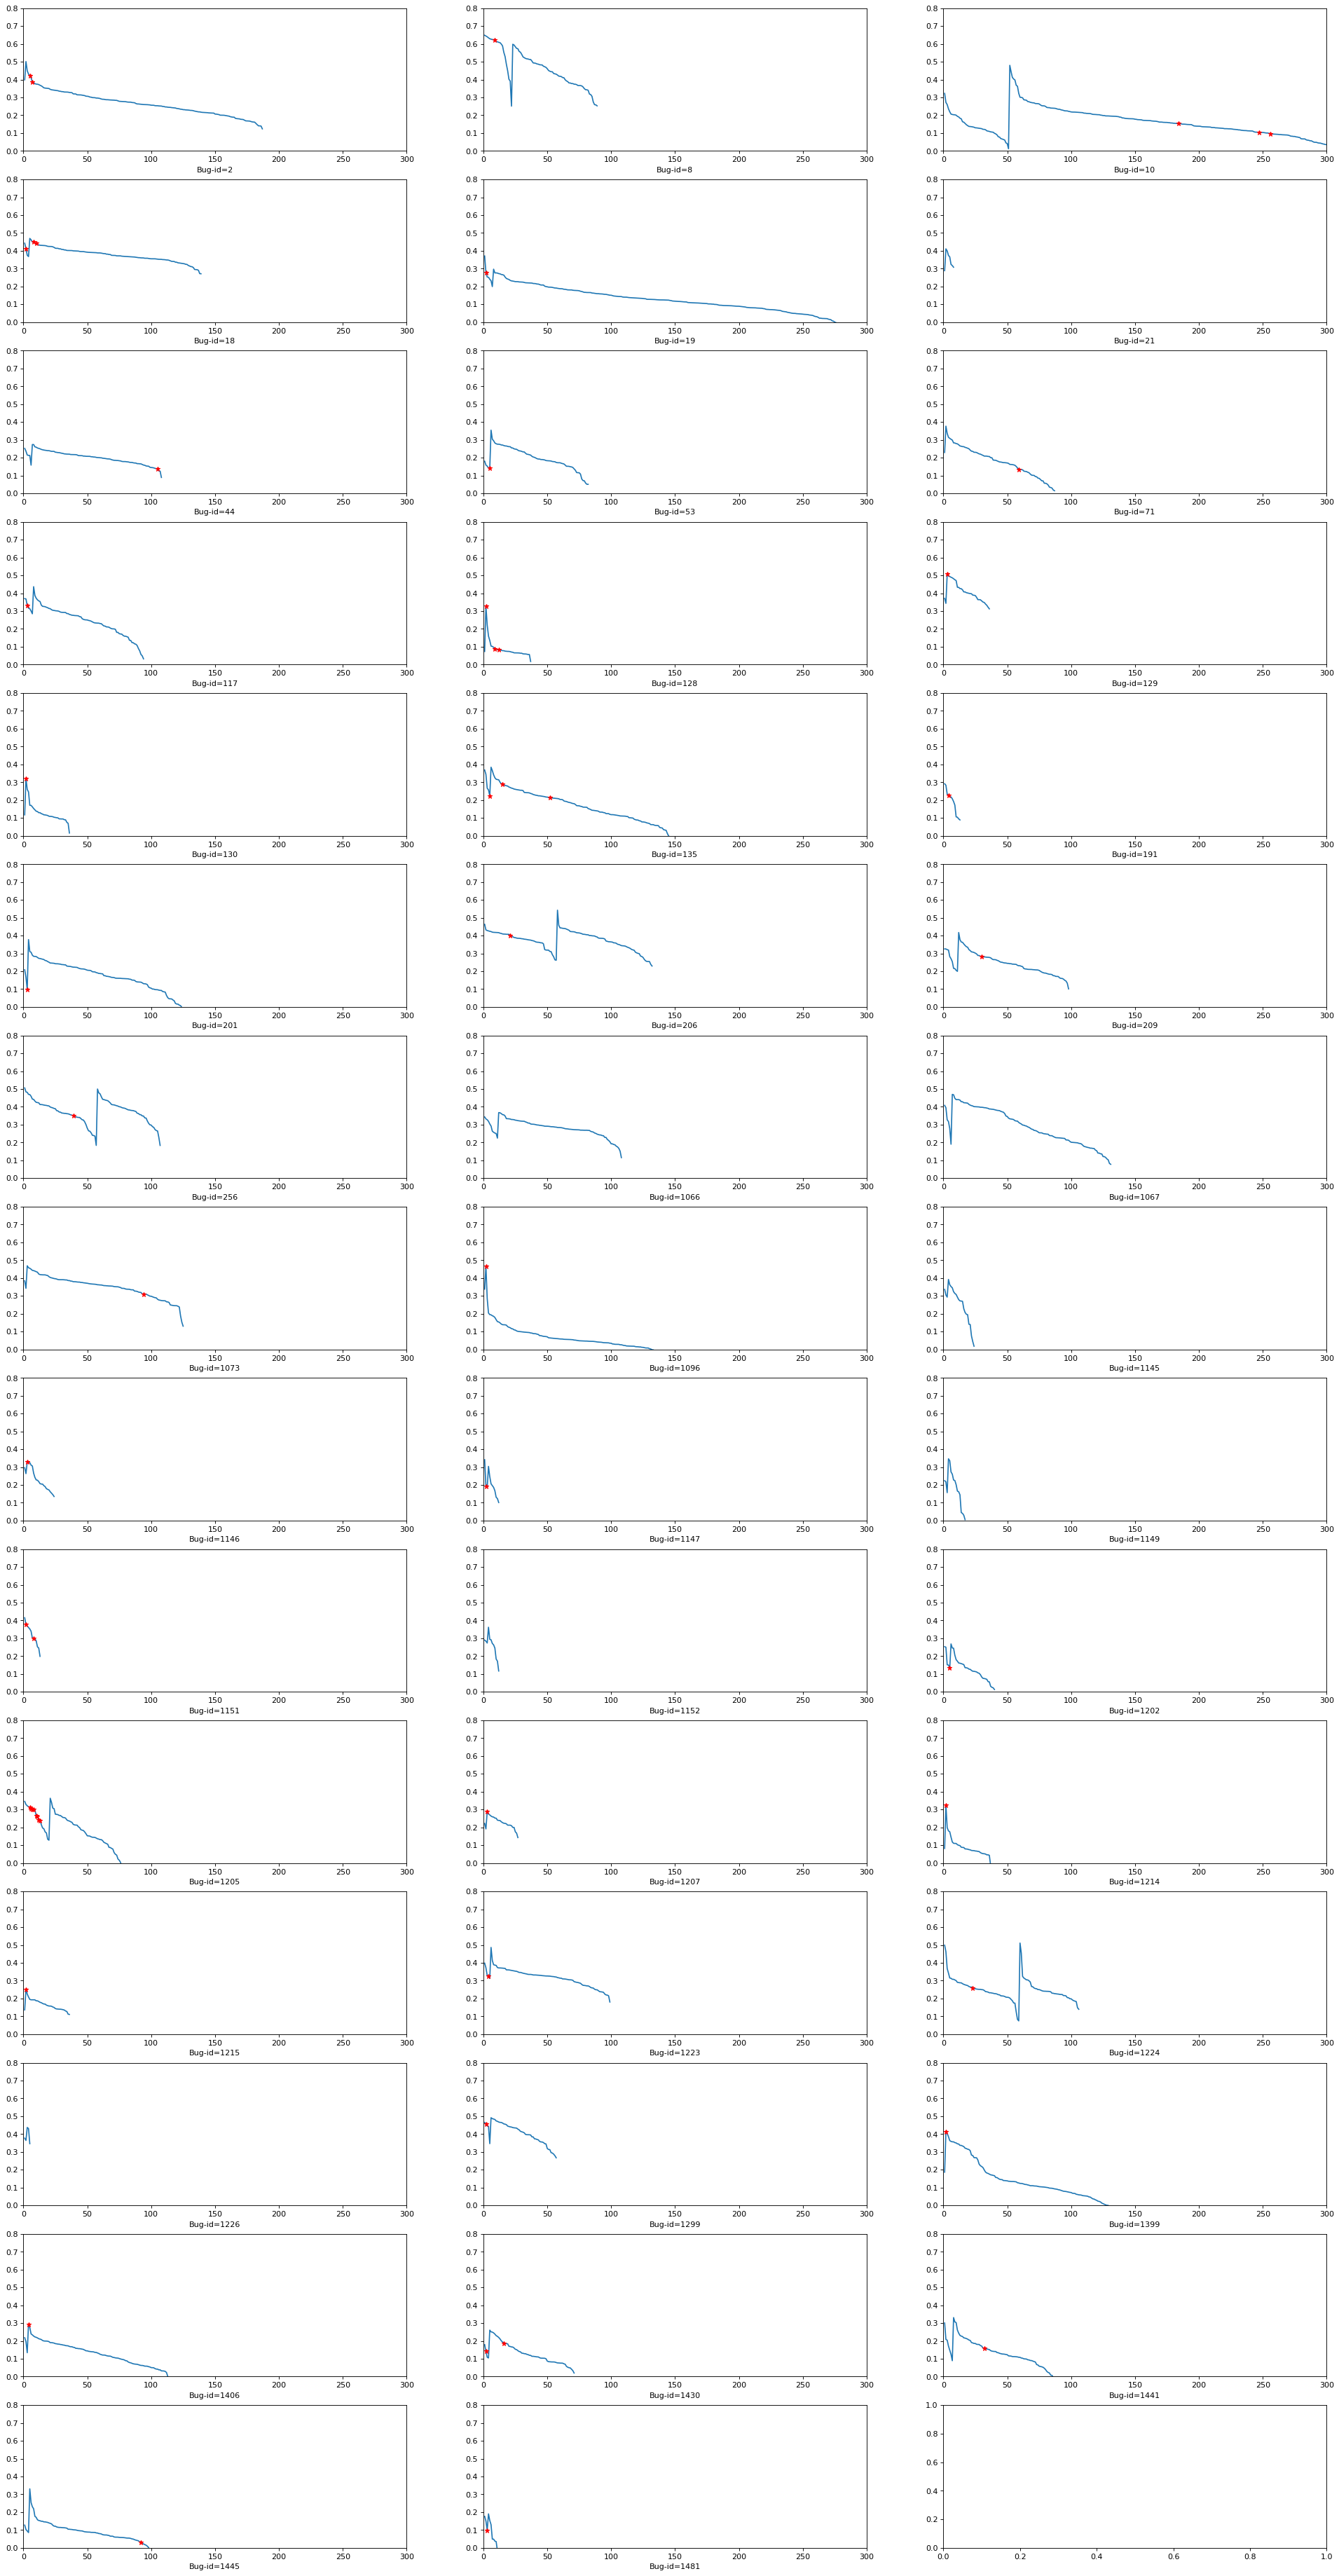

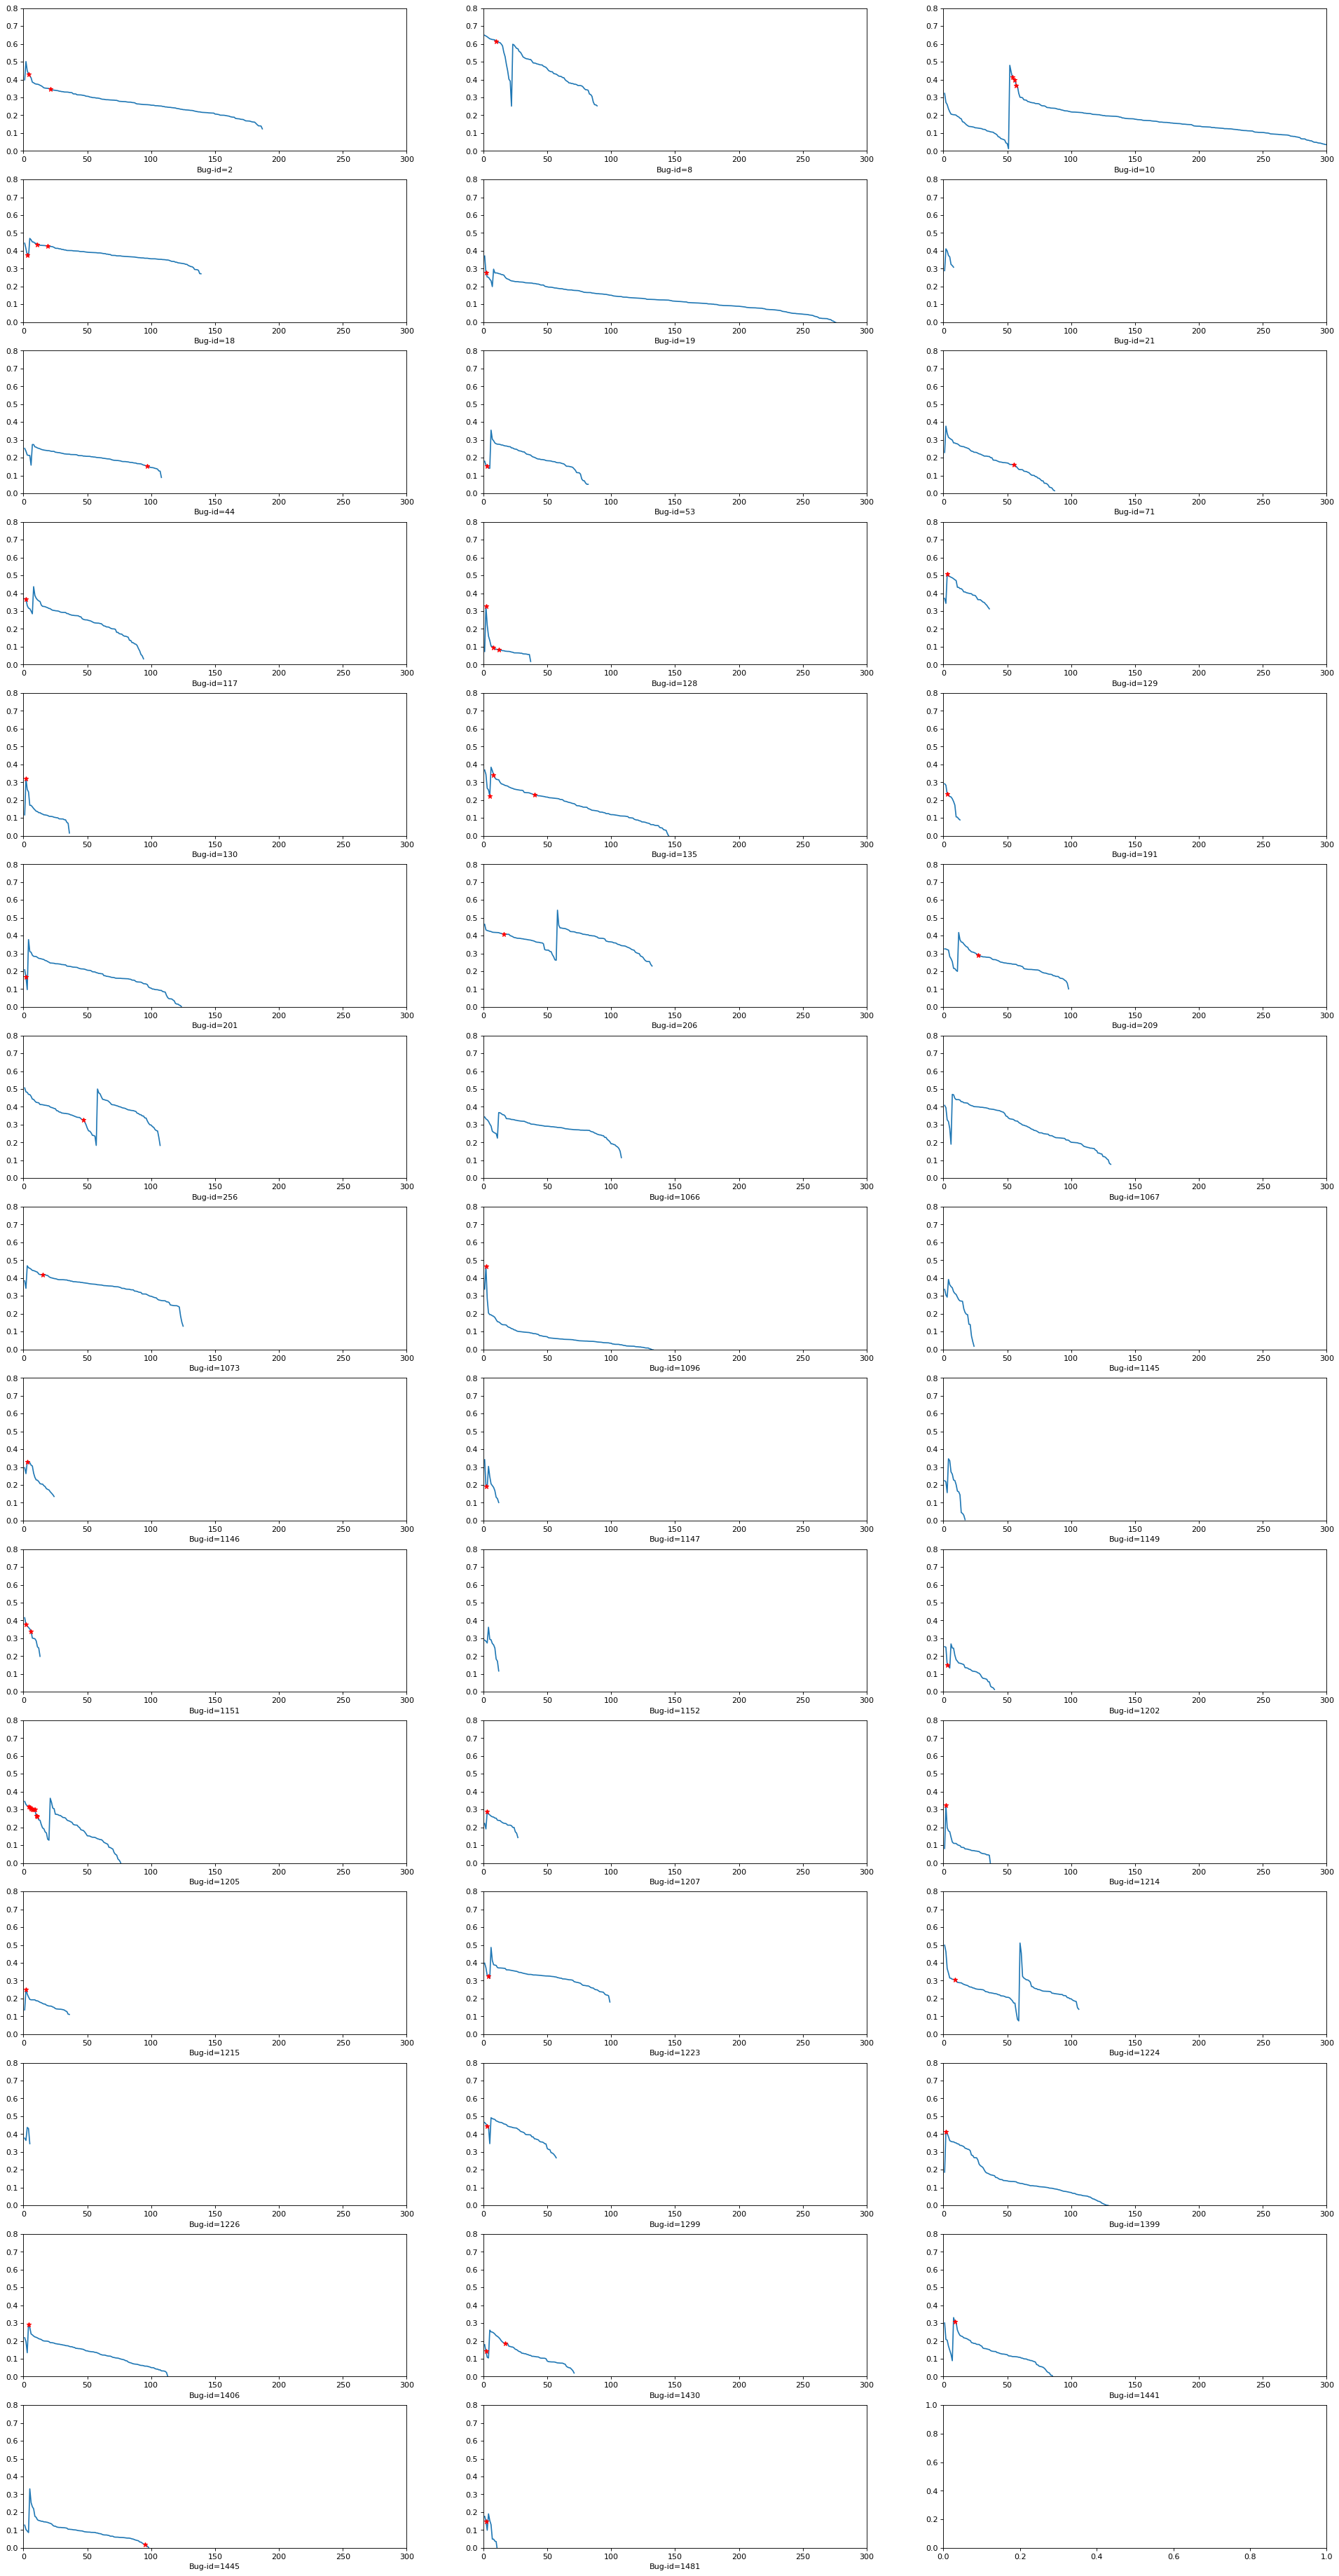

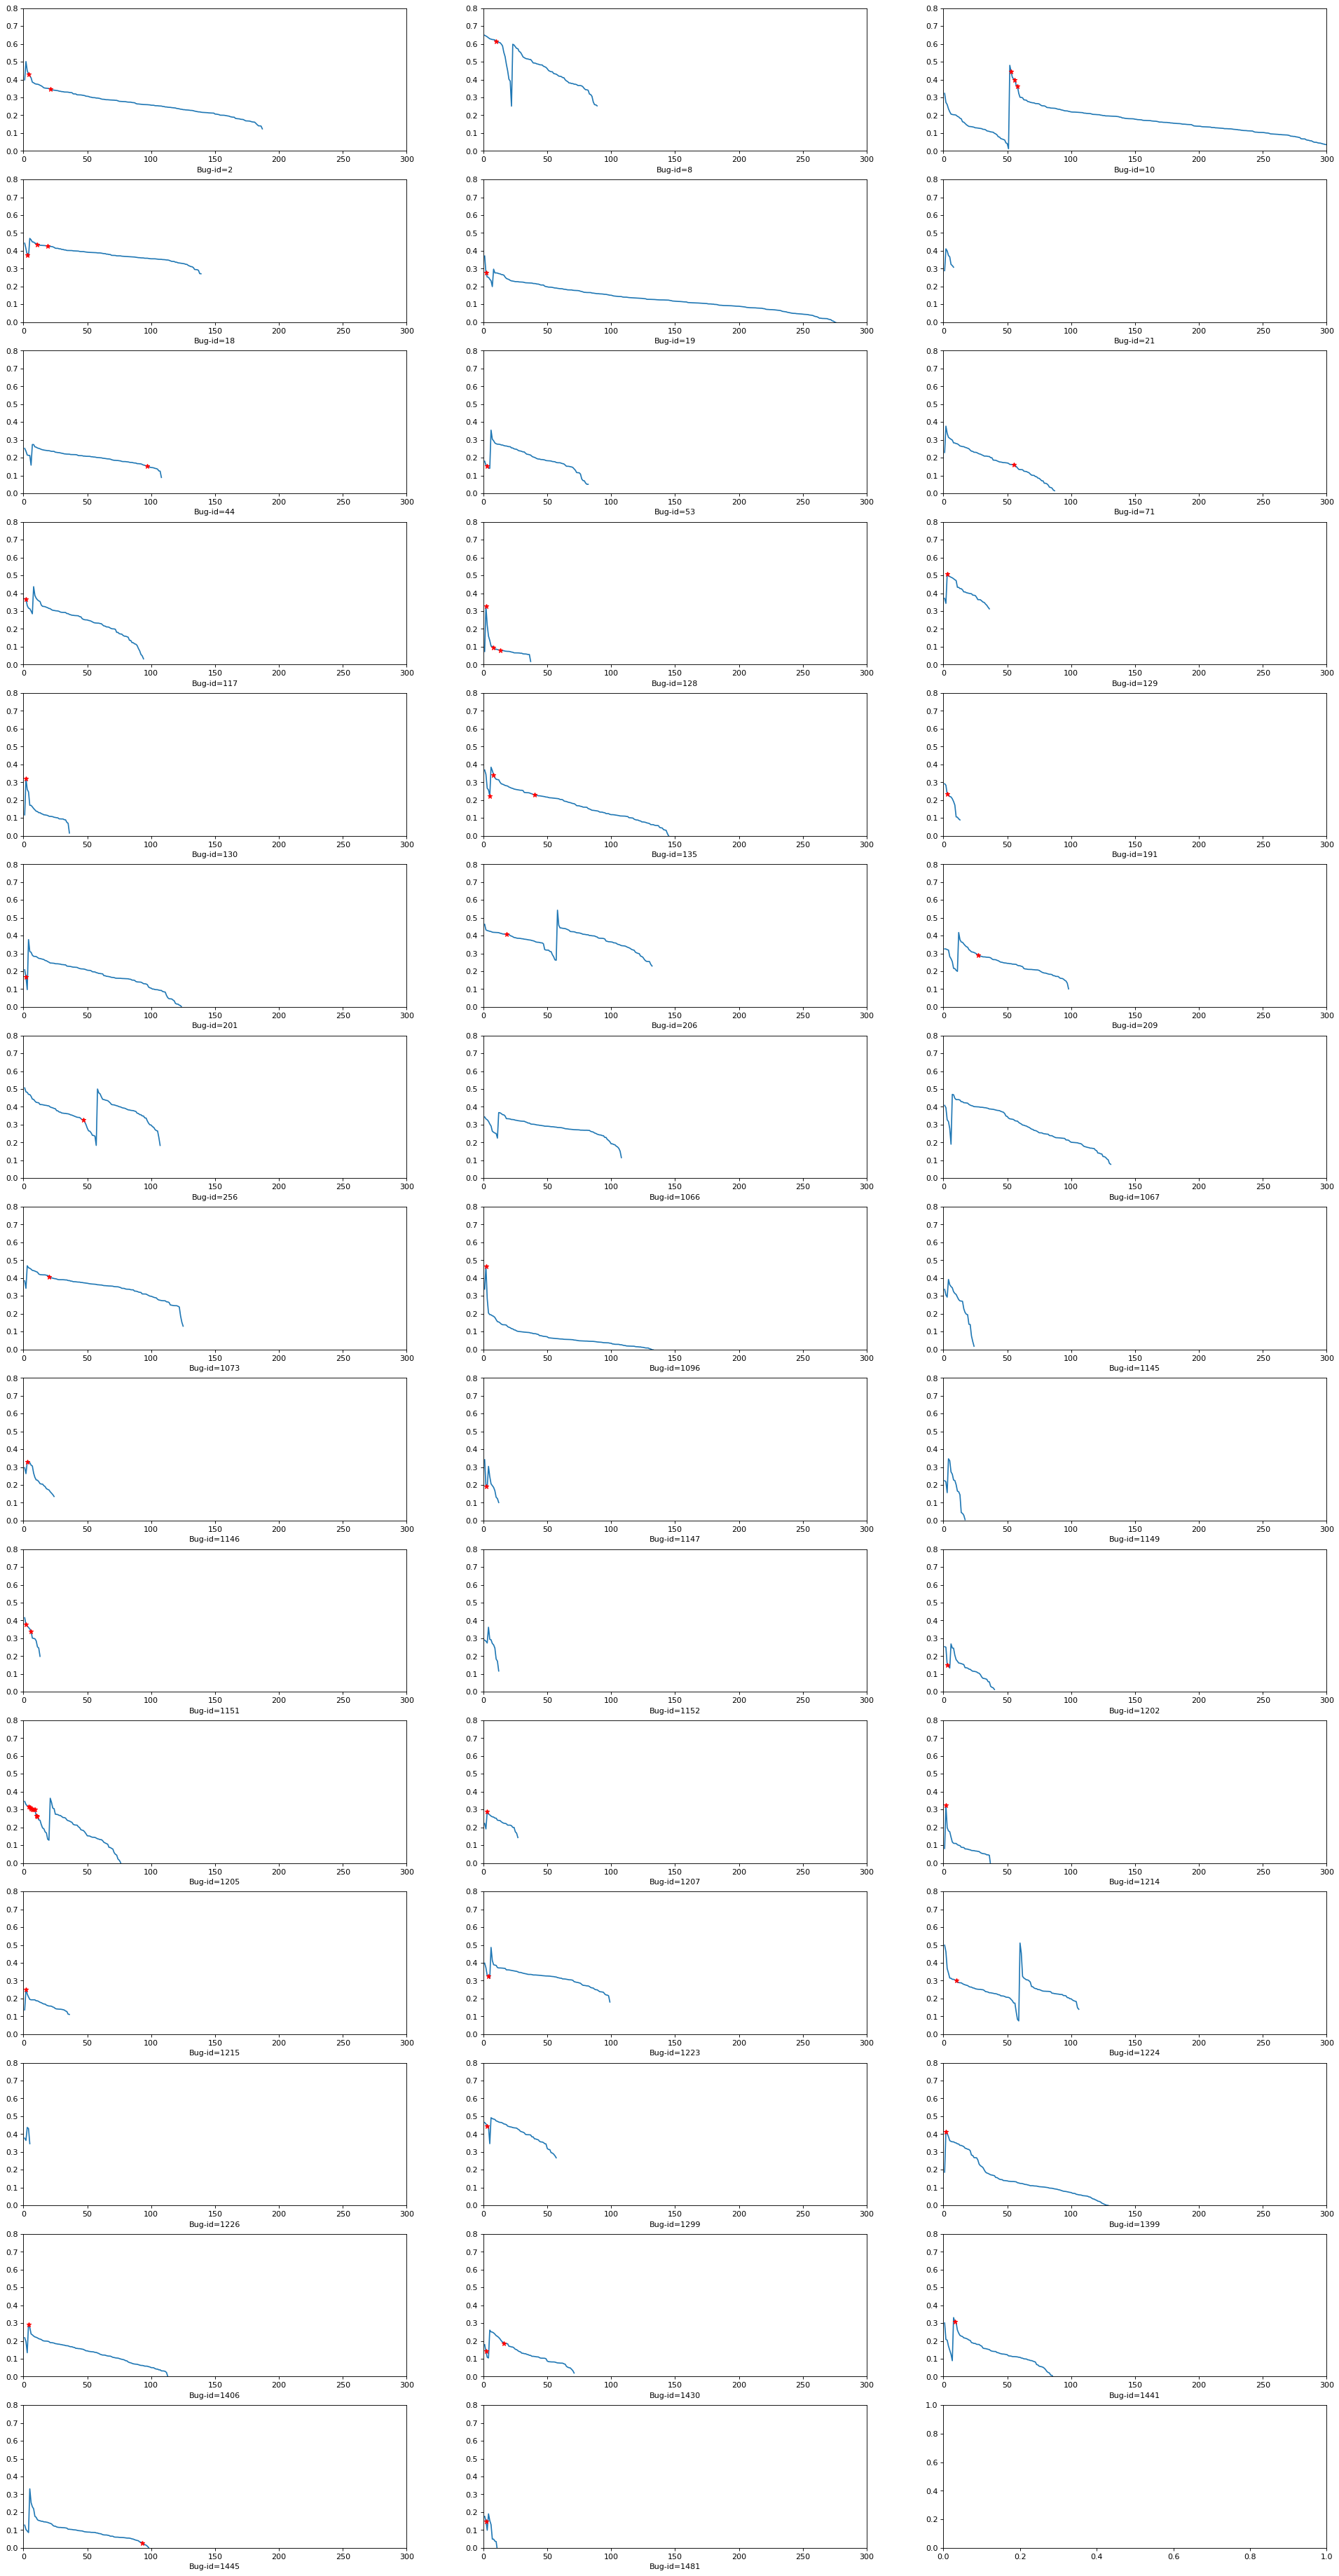

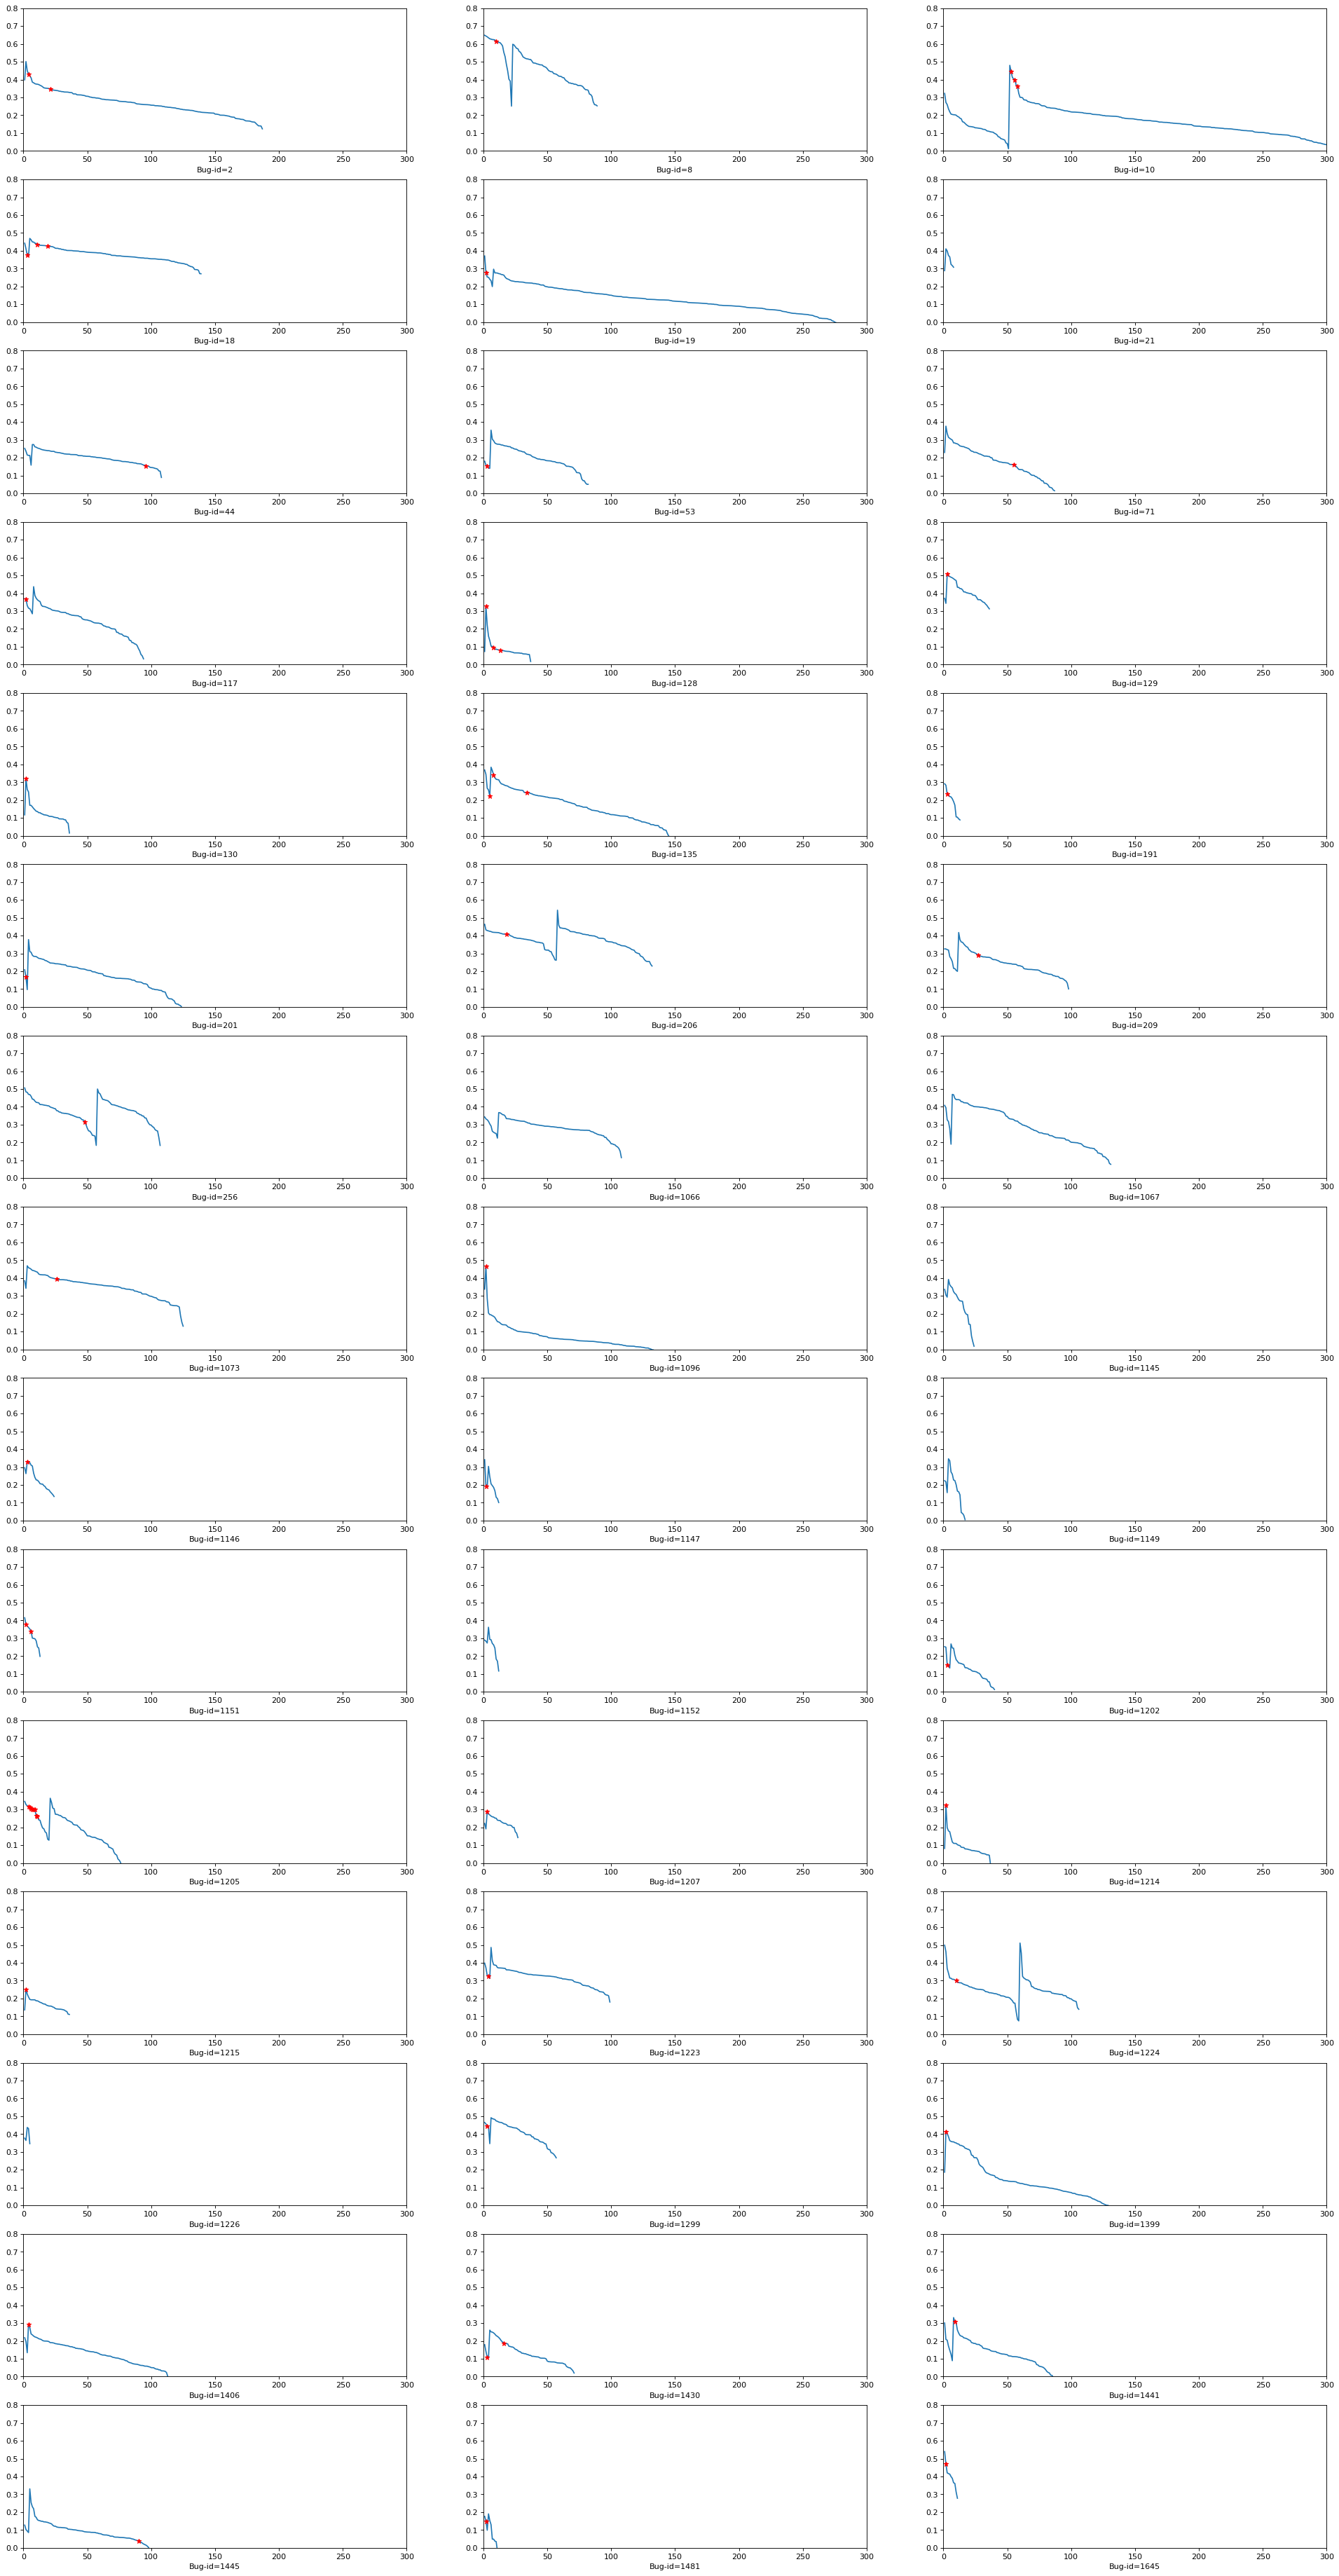

In [4]:
figure_dir = '/Users/junayed/Documents/NecessaryDocs/GeorgeMasonUniversity/Research/Projects/BugLocalization/FaultLocalizationCode/SourceCodeMapping/MappingAndroidProject/results/11:22:22/Figures'
config = 'Filtering-Boosting-GUI-Interacted-'
create_similarity_figure('Ranking of Buggy files among files that are ranked based on BASELINE - Sentence Transformers', figure_dir + "/" + config + 'sentence-transformers.png')
create_similarity_figure('Ranking of Buggy Files (Query Replacement: use GUI_State_and_Interacted_GUI_Component_ID as query)', figure_dir + "/" + config + 'replaced-query.png')
create_similarity_figure('Ranking of Buggy Files (Query Expansion 1st configuration)', figure_dir + "/" + config + 'query-expansion-1.png')
create_similarity_figure('Ranking of Buggy Files (Query Expansion 2nd configuration)', figure_dir + "/" + config + 'query-expansion-2.png')
create_similarity_figure('Ranking of Buggy Files (Query Expansion 3rd configuration)', figure_dir + "/" + config + 'query-expansion-3.png')

In [16]:
def string_to_list(buggy_ranks):
    if len(buggy_ranks)>=3:
        buggy_ranks = buggy_ranks[1:len(buggy_ranks)-1]
        buggy_ranks = buggy_ranks.split(', ')
    else:
        buggy_ranks = []
    return buggy_ranks

#plt.cla()
fig = plt.figure(figsize=(20, 12), dpi=80)
ind=0
for bug_id, app_state in bug_ids_states:
    #sentence-transformers
    files_for_bug_id_st = file_list_df_st.loc[file_list_df_st['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
    cos_scores_st = file_list_df_st.loc[file_list_df_st['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
    buggy_ranks_st = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), 'Ranking of Buggy files among files that are ranked based on BASELINE - Sentence Transformers'].values[0]
    buggy_ranks_st = string_to_list(buggy_ranks_st)
    #print(buggy_ranks_st)
    
#     #replaced-query
#     files_for_bug_id_replaced_query = file_list_df_replaced_query.loc[file_list_df_replaced_query['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
#     cos_scores_replaced_query = file_list_df_replaced_query.loc[file_list_df_replaced_query['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
#     buggy_ranks_replaced_query = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), 'Ranking of Buggy Files (Query Replacement: use GUI_State_and_Interacted_GUI_Component_ID as query)'].values[0]
#     buggy_ranks_replaced_query = string_to_list(buggy_ranks_replaced_query)
    
#     #query-expansion-1
#     files_for_bug_id_query_expanstion_one = file_list_df_query_expanstion_one.loc[file_list_df_query_expanstion_one['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
#     cos_scores_query_expanstion_one = file_list_df_query_expanstion_one.loc[file_list_df_query_expanstion_one['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
#     buggy_ranks_query_expansion_one = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), 'Ranking of Buggy Files (Query Expansion 1st configuration)'].values[0]
#     buggy_ranks_query_expansion_one = string_to_list(buggy_ranks_query_expansion_one)
    
#     #query-expansion-2
#     files_for_bug_id_query_expanstion_two = file_list_df_query_expanstion_two.loc[file_list_df_query_expanstion_two['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
#     cos_scores_query_expanstion_two = file_list_df_query_expanstion_two.loc[file_list_df_query_expanstion_two['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
#     buggy_ranks_query_expansion_two = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), 'Ranking of Buggy Files (Query Expansion 2nd configuration)'].values[0]
#     buggy_ranks_query_expansion_two = string_to_list(buggy_ranks_query_expansion_two)
    
#     #query-expansion-3
#     files_for_bug_id_query_expanstion_three = file_list_df_query_expanstion_three.loc[file_list_df_query_expanstion_three['Bug Report ID']==int(bug_id), 'FilePaths'].values.tolist()
#     cos_scores_query_expanstion_three = file_list_df_query_expanstion_three.loc[file_list_df_query_expanstion_three['Bug Report ID']==int(bug_id), 'Cosine Similarity Scores'].values.tolist()
#     buggy_ranks_query_expansion_three = combined_results_df.loc[combined_results_df['Bug Report ID']==int(bug_id), 'Ranking of Buggy Files (Query Expansion 3rd configuration)'].values[0]
#     buggy_ranks_query_expansion_three = string_to_list(buggy_ranks_query_expansion_three)
    
    plt.subplot(bug_id)
    x_axis_values = list(range(1,len(cos_scores_st)+1))
    plt.plot(x_axis_values, cos_scores_st)
    
    
    for i in range(0, len(buggy_ranks_st)):
        #print(buggy_ranks_st[i])
        plt.plot(x_axis_values[int(buggy_ranks_st[i])], cos_scores_st[int(buggy_ranks_st[i])], 'r*')
#         plt.plot(x_axis_values, cos_scores_replaced_query)
#         plt.plot(x_axis_values, cos_scores_query_expanstion_one)
#         plt.plot(x_axis_values, cos_scores_query_expanstion_two)
#         plt.plot(x_axis_values, cos_scores_query_expanstion_three)
#     plt.legend(['sentence-transformers', 'replaced-query', 'query-expansion-1', 'query-expansion-2', 'query-expansion-3'])
    #plt.xlabel('Bug-id=' + bug_id)
    plt.ylabel('cosine-similarity')
    ind = ind+1
        
    
    plt.savefig('/Users/junayed/Documents/NecessaryDocs/GeorgeMasonUniversity/Research/Projects/BugLocalization/FaultLocalizationCode/SourceCodeMapping/MappingAndroidProject/results/Forgraph/Boosting-GUI+Interacted/Figures/'+bug_id+'.png')

ValueError: Single argument to subplot must be a 3-digit integer

<Figure size 1600x960 with 0 Axes>

In [6]:
files_for_bug_id[:10]
cos_scores[:10]

[0.3986966013908386,
 0.5012335181236267,
 0.4541315734386444,
 0.4494918286800385,
 0.4389260113239288,
 0.43694716691970825,
 0.4346984624862671,
 0.432576596736908,
 0.4312859177589417,
 0.4306034445762634]

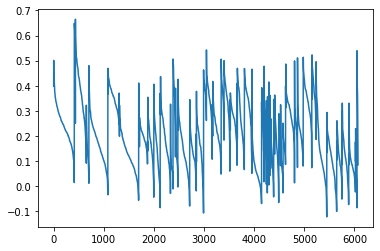

In [9]:
x_axis_values = list(range(1,len(cosine_sim_scores)+1))
plt.plot(x_axis_values, cosine_sim_scores)

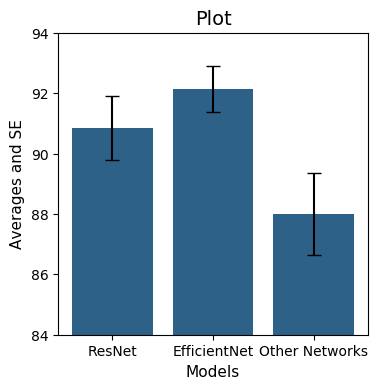

In [4]:
fig = plt.subplots(figsize =(4, 4), dpi=100)
labels = models
plt.xlabel('Models', fontsize=11)
plt.ylabel('Averages and SE', fontsize=11)
plt.title('Plot', fontsize=14)
plt.ylim(84,94)
plt.bar(x=models, height = averages, capsize=5, yerr = std_errors, color ='#2D6187')
plt.savefig('plot.png', transparent=True)